# First Name:
# Last Name:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Import dataset - gapminder

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
#setting variables you will be working with to numeric
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce')
gapminder['incomeperperson'] = pd.to_numeric(gapminder['incomeperperson'],errors='coerce')

In [4]:
gapminder_clean=gapminder.dropna()

# Correlation

# Example 1

Text(0.5, 1.0, 'Scatterplot for the Association Between Urban Rate\nand Internet Use Rate')

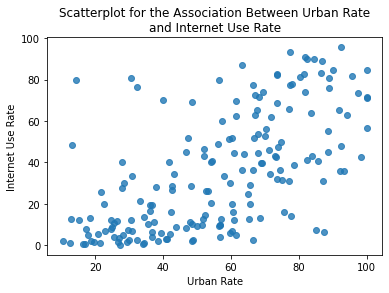

In [5]:
%matplotlib inline
plt.figure()
scat1 = sns.regplot(x="urbanrate", y="internetuserate", fit_reg=False, data=gapminder_clean)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate' + '\n' + 'and Internet Use Rate')

In [6]:
print ('association between urbanrate and internetuserate')
print (scipy.stats.pearsonr(gapminder_clean['urbanrate'], gapminder_clean['internetuserate']))

association between urbanrate and internetuserate
(0.6244640029489793, 4.540316299446874e-21)


# Example 2

Text(0.5, 1.0, 'Scatterplot for the Association\nBetween Income per Person and Internet Use Rate')

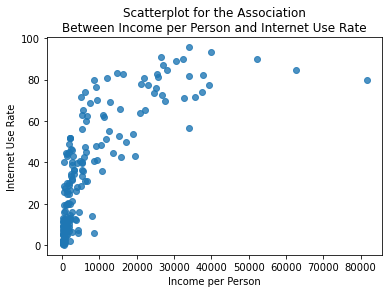

In [7]:
%matplotlib inline
plt.figure()
scat2 = sns.regplot(x="incomeperperson", y="internetuserate", fit_reg=False, data=gapminder)
plt.xlabel('Income per Person')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association' + '\n' + 'Between Income per Person and Internet Use Rate')

In [8]:
print ('association between incomeperperson and internetuserate')
print (scipy.stats.pearsonr(gapminder_clean['incomeperperson'], gapminder_clean['internetuserate']))

association between incomeperperson and internetuserate
(0.7507274333051273, 3.067338031233027e-34)


# Regression

# Example 1

Text(0.5, 1.0, 'Scatterplot for the Association Between Urban Rate\nand Internet Use Rate')

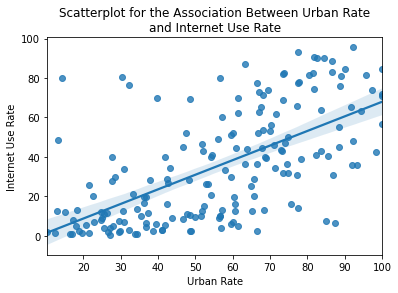

In [9]:
%matplotlib inline
scat1 = sns.regplot(x="urbanrate", y="internetuserate", fit_reg=True, data=gapminder_clean)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate' + '\n' + 'and Internet Use Rate')

In [10]:
import statsmodels.formula.api as smf

print ("OLS regression model for the association between urban rate and internet use rate")
reg1 = smf.ols('internetuserate ~ urbanrate', data=gapminder_clean).fit()
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 20 May 2021   Prob (F-statistic):           4.54e-21
Time:                        16:10:39   Log-Likelihood:                -819.54
No. Observations:                 182   AIC:                             1643.
Df Residuals:                     180   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Text(0.5, 1.0, 'Residual Plot')

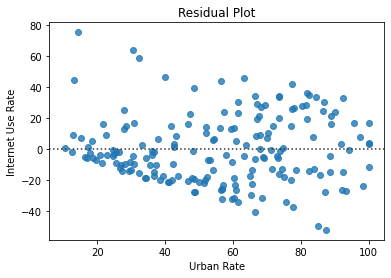

In [11]:
%matplotlib inline
scat1 = sns.residplot(x="urbanrate", y="internetuserate",  data=gapminder_clean)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Residual Plot')

# Example 2

Text(0.5, 1.0, 'Scatterplot for the Association\nBetween Income per Person and Internet Use Rate')

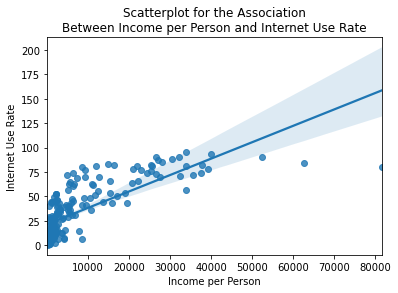

In [12]:
plt.figure()
scat2 = sns.regplot(x="incomeperperson", y="internetuserate", fit_reg=True, data=gapminder)
plt.xlabel('Income per Person')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association' + '\n' + 'Between Income per Person and Internet Use Rate')

In [13]:
print ("OLS regression model for the association between urban rate and internet use rate")
reg1 = smf.ols('internetuserate ~ incomeperperson', data=gapminder_clean).fit()
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     232.5
Date:                Thu, 20 May 2021   Prob (F-statistic):           3.07e-34
Time:                        16:10:40   Log-Likelihood:                -789.06
No. Observations:                 182   AIC:                             1582.
Df Residuals:                     180   BIC:                             1589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

Text(0.5, 1.0, 'Residual Plot')

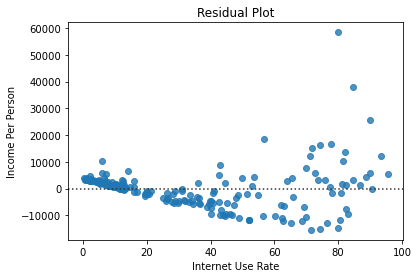

In [14]:
%matplotlib inline
scat1 = sns.residplot(x="internetuserate", y="incomeperperson",  data=gapminder_clean)
plt.xlabel('Internet Use Rate')
plt.ylabel('Income Per Person')
plt.title('Residual Plot')

# Extend Example (3 variables)

In [15]:
def incomegroup (row):
   if row['incomeperperson'] <= 744.239:
      return 1
   elif row['incomeperperson'] <= 9425.326 :
      return 2
   elif row['incomeperperson'] > 9425.326:
      return 3

In [16]:
gapminder_clean['incomegrp'] = gapminder_clean.apply (lambda row: incomegroup (row),axis=1)
gapminder_clean[['country','incomegrp',]].head()

<ipython-input-16-03f940673e23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder_clean['incomegrp'] = gapminder_clean.apply (lambda row: incomegroup (row),axis=1)


,country,incomegrp
1,Albania,2
2,Algeria,2
3,Andorra,3
4,Angola,2
5,Antigua and Barbuda,3


In [17]:
chk1 = gapminder_clean['incomegrp'].value_counts(sort=False, dropna=False)
print(chk1)

1    45
2    92
3    45
Name: incomegrp, dtype: int64


In [18]:
sub1=gapminder_clean[(gapminder_clean['incomegrp']== 1)]
sub2=gapminder_clean[(gapminder_clean['incomegrp']== 2)]
sub3=gapminder_clean[(gapminder_clean['incomegrp']== 3)]

AxesSubplot(0.125,0.125;0.775x0.755)


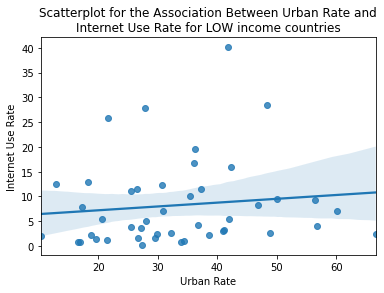

In [19]:
%matplotlib inline
scat1 = sns.regplot(x="urbanrate", y="internetuserate", data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and' +  '\n' + 'Internet Use Rate for LOW income countries')
print (scat1)

In [20]:
print ('OLS regression model for the association between urban rate and internet use rate for' + '\n' + 'LOW income countries')
reg1 = smf.ols('internetuserate ~ urbanrate', data=sub1).fit()
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate for
LOW income countries
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5822
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.450
Time:                        16:10:41   Log-Likelihood:                -160.43
No. Observations:                  45   AIC:                             324.9
Df Residuals:                      43   BIC:                             328.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

AxesSubplot(0.125,0.125;0.775x0.755)


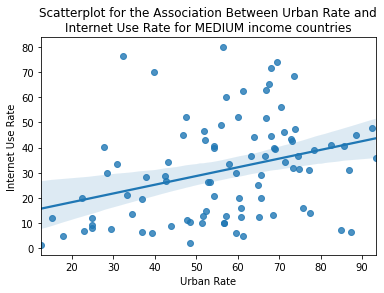

In [21]:
%matplotlib inline
scat1 = sns.regplot(x="urbanrate", y="internetuserate", data=sub2)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and' +  '\n' + 'Internet Use Rate for MEDIUM income countries')
print (scat1)

In [22]:
print ('OLS regression model for the association between urban rate and internet use rate for' + '\n' + 'MEDIUM income countries')
reg1 = smf.ols('internetuserate ~ urbanrate', data=sub2).fit()
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate for
MEDIUM income countries
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     10.93
Date:                Thu, 20 May 2021   Prob (F-statistic):            0.00136
Time:                        16:10:41   Log-Likelihood:                -399.37
No. Observations:                  92   AIC:                             802.7
Df Residuals:                      90   BIC:                             807.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Text(0.5, 1.0, 'Residual Plot - Medium Income Countries')

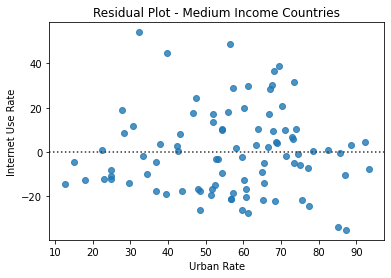

In [23]:
%matplotlib inline
scat1 = sns.residplot(x="urbanrate", y="internetuserate",  data=sub2)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Residual Plot - Medium Income Countries')

AxesSubplot(0.125,0.125;0.775x0.755)


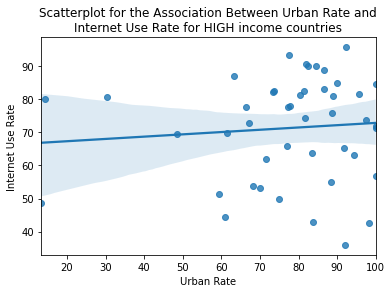

In [24]:
%matplotlib inline
scat1 = sns.regplot(x="urbanrate", y="internetuserate", data=sub3)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and' +  '\n' + 'Internet Use Rate for HIGH income countries')
print (scat1)

In [25]:
print ('OLS regression model for the association between urban rate and internet use rate for' + '\n' + 'HIGH income countries')
reg1 = smf.ols('internetuserate ~ urbanrate', data=sub3).fit()
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate for
HIGH income countries
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.3470
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.559
Time:                        16:10:41   Log-Likelihood:                -186.46
No. Observations:                  45   AIC:                             376.9
Df Residuals:                      43   BIC:                             380.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------